In [ ]:
#!pip install xlrd


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
from wordcloud import WordCloud
from os import walk
from string import punctuation
from random import shuffle
from collections import Counter
import multiprocessing
import email
from google.colab import files
import re



from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
%matplotlib inline

import sklearn as sk
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
data = pd.read_excel('EnronFullDataset.xlsx')
data

data = data.drop(labels=range(2000, 30493), axis=0)

In [ ]:
#X = data.drop(labels=range(1000, 30493), axis=0)
#X = data['email']
#y= data['label']

In [ ]:
data['label'].value_counts()

ham     1004
spam     996
Name: label, dtype: int64

In [ ]:
def clean_column(data):
    if data is not None:
        stopwords_list = stopwords.words('english')
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
        data =  data.lower()
        data = re.sub('re:', '', data)
        data = re.sub('-', '', data)
        data = re.sub('_', '', data)
        # Remove data between square brackets
        data =re.sub('\[[^]]*\]', '', data)
        # removes punctuation
        data = re.sub(r'[^\w\s]','',data)
        data = re.sub(r'\n',' ',data)
        data = re.sub(r'[0-9]+','',data)
        #remove subject keyword
        data = re.sub(r'subject','',data)
        # strip html
        p = re.compile(r'<.*?>')
        data = re.sub(r"\'ve", " have ", data)
        data = re.sub(r"can't", "cannot ", data)
        data = re.sub(r"n't", " not ", data)
        data = re.sub(r"I'm", "I am", data)
        data = re.sub(r" m ", " am ", data)
        data = re.sub(r"\'re", " are ", data)
        data = re.sub(r"\'d", " would ", data)
        data = re.sub(r"\'ll", " will ", data)
        data = re.sub('forwarded by phillip k allenhouect on    pm', '',data)
        data = re.sub(r"httpitcappscorpenroncomsrrsauthemaillinkaspidpage", "", data)
        #data = re.sub(r"http", "", data)

        data = p.sub('', data)
        if 'forwarded by:' in data:
            data = data.split('subject')[1]
        data = data.strip()
        return data
    return 'No Subject'

data = data.drop_duplicates(keep='first')
data["body_text_clean"] = data["email"].apply(clean_column)
data

In [ ]:
data['label'] = data['label'].apply(lambda x:1 if x=='spam' else 0)  #1 for spam and 0 for ham
data

,email,label,length,body_text_clean
0,Subject: re : current address for brad romine\...,0,980,re current address for brad romine vince i...
1,Subject: important message - make it longer\n ...,1,531,important message make it longer longer org...
2,"Subject: contract update\n sheila ,\n some min...",0,318,contract update sheila some minor differenc...
3,"Subject: re : account # 15744374 g\n hello ,\n...",1,456,re account g hello we sent you an email ...
4,Subject: fw : shy sluts getting fucekd hard in...,1,79,fw shy sluts getting fucekd hard in nature b...
...,...,...,...,...
1995,Subject: seeking intelligent insight\n it look...,0,521,seeking intelligent insight it looks to me li...
1996,"Subject: hpl noms for june 23 , 2000 revision ...",0,140,hpl noms for june revision revision for ...
1997,Subject: cia - llis softabs is the best 7 jhsg...,1,504,cia llis softabs is the best jhsg ci iali...
1998,Subject: entex\n attached is a write - up on e...,0,827,entex attached is a write up on entex that w...


In [ ]:
#!pip install xlsxwriter
#import xlsxwriter
#data.to_excel('ten.xlsx', engine='xlsxwriter')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000, stop_words='english')

X = tfidf.fit_transform(data['body_text_clean']).toarray()
y = data['label'].values

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf.vocabulary_

{'current': 636,
 'address': 43,
 'brad': 309,
 'vince': 2872,
 'left': 1470,
 'messages': 1644,
 'cell': 403,
 'phone': 1973,
 'suggestions': 2614,
 'kaminski': 1405,
 'shirley': 2458,
 'crenshaw': 628,
 'hou': 1228,
 'ect': 821,
 'cc': 396,
 'pm': 2004,
 'forwarded': 1065,
 'carol': 386,
 'possibility': 2028,
 'updated': 2814,
 'know': 1429,
 'thanks': 2685,
 'important': 1276,
 'message': 1643,
 'make': 1572,
 'longer': 1528,
 'life': 1485,
 'rock': 2336,
 'hard': 1181,
 'erections': 888,
 'like': 1487,
 'increased': 1289,
 'sexual': 2439,
 'desire': 709,
 'enhanced': 865,
 'porn': 2018,
 'star': 2555,
 'watch': 2900,
 'multiple': 1725,
 'volume': 2884,
 'cover': 621,
 'want': 2892,
 'information': 1307,
 'delete': 687,
 'actions': 27,
 'speak': 2526,
 'words': 2959,
 'contract': 580,
 'update': 2813,
 'sheila': 2451,
 'draft': 786,
 'final': 1013,
 'executed': 923,
 'version': 2859,
 'bring': 323,
 'today': 2715,
 'shall': 2442,
 'send': 2415,
 'copy': 594,
 'tomorrow': 2718,
 'han

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

In [ ]:
class MultinomialNBC(object):
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        count_sample = X.shape[0]
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
        self.class_log_prior_ = [np.log(len(i) / count_sample) for i in separated]
        count = np.array([np.array(i).sum(axis=0) for i in separated]) + self.alpha
        self.feature_log_prob_ = np.log(count / count.sum(axis=1)[np.newaxis].T)
        return self

    def predict_log_proba(self, X):
        return [(self.feature_log_prob_ * x).sum(axis=1) + self.class_log_prior_
                for x in X]

    def predict(self, X):
        return np.argmax(self.predict_log_proba(X), axis=1)

nbC = MultinomialNBC(alpha=1)

In [ ]:
class BernoulliNB(object):
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        count_sample = X.shape[0]
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
        self.class_log_prior_ = [np.log(len(i) / count_sample) for i in separated]
        count = np.array([np.array(i).sum(axis=0) for i in separated]) + self.alpha
        smoothing = 2 * self.alpha
        n_doc = np.array([len(i) + smoothing for i in separated])
        self.feature_prob_ = count / n_doc[np.newaxis].T
        return self

    def predict_log_proba(self, X):
        return [(np.log(self.feature_prob_) * x + \
                 np.log(1 - self.feature_prob_) * np.abs(x - 1)
                ).sum(axis=1) + self.class_log_prior_ for x in X]

    def predict(self, X):
        return np.argmax(self.predict_log_proba(X), axis=1)

nb = BernoulliNB(alpha=1)

In [ ]:
class GaussianNB(object):
    def __init__(self):
        pass

    def fit(self, X, y):
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
        self.model = np.array([np.c_[np.mean(i, axis=0), np.std(i, axis=0)]
                    for i in separated])
        return self

    def _prob(self, x, mean, std):
        exponent = np.exp(- ((x - mean)**2 / (2 * std**2)))
        return np.log(exponent / (np.sqrt(2 * np.pi) * std))

    def predict_log_proba(self, X):
        return [[sum(self._prob(i, *s) for s, i in zip(summaries, x))
                for summaries in self.model] for x in X]

    def predict(self, X):
        return np.argmax(self.predict_log_proba(X), axis=1)

nbg = GaussianNB()

In [ ]:
def euclidean_distance(a, b):
  return np.sqrt(np.sum((a-b)**2))

class KNN:
  def __init__(self, k=5):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return np.array(predictions)

  def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

    k_indices = np.argsort(distances)[:self.k]
    k_labels = [self.y_train[i] for i in k_indices]

    most_common = Counter(k_labels).most_common()
    return most_common[0][0]

knn = KNN(k=11)

In [ ]:
class KMeans(object):
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X, y):
        if self.random_state:
            np.random.seed(self.random_state)
        initial = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.cluster_centers_ = X[initial]

        for _ in range(self.max_iter):
            self.labels_ = [self._nearest(self.cluster_centers_, x) for x in X]
            indices = [[i for i, l in enumerate(self.labels_) if l == j]
                        for j in range(self.n_clusters)]
            X_by_cluster = [X[i] for i in indices]
            # update the clusters
            self.cluster_centers_ = [c.sum(axis=0) / len(c) for c in X_by_cluster]
        # sum of square distances from the closest cluster
        self.inertia_ = sum(((self.cluster_centers_[l] - x)**2).sum()
                            for x, l in zip(X, self.labels_))
        return self

    def _nearest(self, clusters, x):
        return np.argmin([self._distance(x, c) for c in clusters])

    def _distance(self, a, b):
        return np.sqrt(((a - b)**2).sum())

    def predict(self, X):
        return self.labels_

    def transform(self, X):
        return [[self._distance(x, c) for c in self.cluster_centers_] for x in X]

    def fit_predict(self, X):
        return self.fit(X).predict(X)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def score(self, X):
        return -self.inertia_

kmeans = KMeans()

In [ ]:
class SVMmodel():
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, idx):
        linear_model = np.dot(x, self.w) + self.b
        return self.cls_map[idx] * linear_model >= 1

    def _get_gradients(self, constrain, x, idx):
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db

        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = - self.cls_map[idx]
        return dw, db

    def _update_weights_bias(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db

    def fit(self, X, y):
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw, db)

    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)

svm2 = SVMmodel(n_iters=1000)

In [ ]:
class LogisticRegressionModel(object):
    def __init__(self, eta=0.1, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.w = np.ones(X.shape[1])
        m = X.shape[0]

        for _ in range(self.n_iter):
            output = X.dot(self.w)
            errors = y - self._sigmoid(output)
            self.w += self.eta / m * errors.dot(X)
        return self

    def predict(self, X):
        output = np.insert(X, 0, 1, axis=1).dot(self.w)
        return (np.floor(self._sigmoid(output) + .5)).astype(int)

    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

logi = LogisticRegressionModel()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    c_matrix = confusion_matrix(y_test, y_pred)

    #plot_confusion_matrix(c_matrix)
    #c = ConfusionMatrixDisplay(c_matrix, clfs.classes_)


    return accuracy , precision, classification, f1score, c_matrix

def plot_confusion_matrix(con_matrix):

  ax = sns.heatmap(con_matrix, annot=True, fmt='d')
  # set x-axis label and ticks.
  ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
  ax.xaxis.set_ticklabels(['Negative', 'Positive'])

  # set y-axis label and ticks
  ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
  ax.yaxis.set_ticklabels(['Negative', 'Positive'])
  ax.set_title("Confusion Matrix for Ensemble", fontsize=14, pad=20);

In [ ]:
def plot_confusion_matrix(con_matrix):

  ax = sns.heatmap(con_matrix, annot=True, fmt='d')
  # set x-axis label and ticks.
  ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
  ax.xaxis.set_ticklabels(['Negative', 'Positive'])

  # set y-axis label and ticks
  ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
  ax.yaxis.set_ticklabels(['Negative', 'Positive'])
  ax.set_title("Confusion Matrix", fontsize=14, pad=20);

In [ ]:
#knc = KNeighborsClassifier(n_neighbors=10)
#lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
from sklearn.ensemble import VotingClassifier
classifiers = [("svm", SVC(kernel= "sigmoid", gamma  = 1.0, probability=True).fit(X_train,y_train)), ("nbc", mnb.fit(X_train,y_train)),
               ("RF", rfc.fit(X_train,y_train)),("Adaboost", abc.fit(X_train,y_train)),("DT", dtc.fit(X_train,y_train))]
ensemble = VotingClassifier(classifiers, voting='soft')


clfs = {
    'SVC': svm2,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb,
    'Ensemble': ensemble
}

accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision, current_classification, current_f1score, con_matrix = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    print("F1 score:", current_f1score)
    print(current_classification)
    print(con_matrix)
    #plot_confusion_matrix(con_matrix)
    #sns.heatmap(con_matrix, annot=True, fmt='d')



For:  SVC
Accuracy:  0.9225
Precision:  0.8616071428571429
F1 score: 0.9256594724220625
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       207
           1       0.86      1.00      0.93       193

    accuracy                           0.92       400
   macro avg       0.93      0.93      0.92       400
weighted avg       0.93      0.92      0.92       400

[[176  31]
 [  0 193]]

For:  KNN
Accuracy:  0.5875
Precision:  0.5391061452513967
F1 score: 0.7005444646098005
              precision    recall  f1-score   support

           0       1.00      0.20      0.34       207
           1       0.54      1.00      0.70       193

    accuracy                           0.59       400
   macro avg       0.77      0.60      0.52       400
weighted avg       0.78      0.59      0.51       400

[[ 42 165]
 [  0 193]]

For:  NB
Accuracy:  0.975
Precision:  0.9692307692307692
F1 score: 0.9742268041237113
              precision    recall  

In [ ]:
#knc = KNeighborsClassifier(n_neighbors=10)
#lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
from sklearn.ensemble import VotingClassifier
classifiers = [("svm", SVC(kernel= "sigmoid", gamma  = 1.0, probability=True).fit(X_train,y_train)),  ("KNN", knc.fit(X_train,y_train)), ("nbc", mnb.fit(X_train,y_train))]
ensemble = VotingClassifier(classifiers, voting='soft')


clfs = {

    'NB': mnb,
    'NBC': nbC, #this one works
    #'BNB': nb,
    #'Kmeans': kmeans,
    #'KNN': knn,
    #'KNC': knc,
    #'SVM': svm2, #this one work
    'SVC': svc,
    'Ensemble':ensemble

    #'SVMG': svm2g,
    #'SVMS': svmo,
    #'SVMR': svmo #session crash
    #'Logi': logi,
    #'LR': lrc,
     #'lda': lda_tfidf,
    #'lda bin': LDA
}
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision, current_classification, x,  con_matrix = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    print(current_classification)
    print(con_matrix)
    #plot_confusion_matrix(con_matrix)
    #sns.heatmap(con_matrix, annot=True, fmt='d')





For:  NB
Accuracy:  0.975
Precision:  0.9692307692307692
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       207
           1       0.97      0.98      0.97       193

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400

[[201   6]
 [  4 189]]

For:  NBC
Accuracy:  0.975
Precision:  0.9692307692307692
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       207
           1       0.97      0.98      0.97       193

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400

[[201   6]
 [  4 189]]

For:  SVC
Accuracy:  0.9825
Precision:  0.965
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       207
           1       0.96    

In [ ]:
#https://medium.com/@alinatabish/machine-learning-techniques-for-spam-detection-in-email-7db87eb11bc2

#Using Topic Modelling for Topic Extraction

In [ ]:
vect =TfidfVectorizer(stop_words='english',max_features=1000)
vect_text=vect.fit_transform(data["body_text_clean"])


print(vect_text.shape)
print(vect_text)

(2000, 1000)
  (0, 884)	0.04189573474293402
  (0, 449)	0.043309617775723334
  (0, 331)	0.05717940313048651
  (0, 642)	0.14535319683947223
  (0, 112)	0.13662718358947243
  (0, 256)	0.38603212213830473
  (0, 382)	0.2233062569329257
  (0, 193)	0.3163745498384236
  (0, 802)	0.44414438277974166
  (0, 444)	0.12538640745541424
  (0, 631)	0.1173028153430795
  (0, 115)	0.164284467883052
  (0, 529)	0.07980527624259219
  (0, 460)	0.07481417869608528
  (0, 947)	0.3465165018081005
  (0, 17)	0.35129482989423416
  (0, 195)	0.3809757917051062
  (1, 979)	0.26433628710310136
  (1, 10)	0.27070932773708206
  (1, 413)	0.14871808565920222
  (1, 955)	0.1716994833518976
  (1, 188)	0.26433628710310136
  (1, 952)	0.23098519072351273
  (1, 957)	0.23652824854235907
  (1, 406)	0.2631451797940359
  :	:
  (1998, 313)	0.10325397997852374
  (1998, 872)	0.10550782591502927
  (1998, 683)	0.0994225194550747
  (1998, 694)	0.08802988891947354
  (1998, 462)	0.16018575726297782
  (1998, 749)	0.13946985488735272
  (1998, 181)

In [ ]:
idf=vect.idf_

In [ ]:
dd=dict(zip(vect.get_feature_names_out(), idf))
l=sorted(dd, key=(dd).get)
#dd

{'ability': 4.523864890678015,
 'able': 3.839228399785977,
 'accept': 4.817212700665472,
 'access': 4.0581075523137295,
 'according': 4.650158616002306,
 'account': 4.068802841430477,
 'accounting': 4.631110421031611,
 'acquisition': 5.135666431784007,
 'act': 4.068802841430477,
 'action': 4.283914221047423,
 'actions': 4.887830267879425,
 'activity': 4.963816174857348,
 'actual': 4.576050643848584,
 'add': 4.612418288019459,
 'added': 4.963816174857348,
 'addition': 4.751254732873675,
 'additional': 4.006282484449144,
 'address': 3.501535906759535,
 'addresses': 5.135666431784007,
 'adobe': 4.863732716300365,
 'advertisement': 4.963816174857348,
 'advertising': 5.305565468579404,
 'advice': 4.540959324037314,
 'africa': 5.046054273094319,
 'afternoon': 4.817212700665472,
 'agent': 4.840202218890171,
 'ago': 4.730201323675843,
 'agree': 4.751254732873675,
 'agreed': 4.912522880469798,
 'agreement': 4.17058553574042,
 'ahead': 4.963816174857348,
 'air': 4.751254732873675,
 'al': 4.42701

In [ ]:
print(dd['enron'])
print(dd['million'])  # million is most common and enron is less common among the email.

2.4338858436953923
3.7035625346328223


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=2,learning_method='online',random_state=42,max_iter=1)

In [ ]:
lda_top=lda_model.fit_transform(vect_text)

In [ ]:
lda_top.shape[0], lda_top.shape[1]

(2000, 2)

In [ ]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(2000, 2)
[[0.86509252 0.13490748]
 [0.51788439 0.48211561]
 [0.81932683 0.18067317]
 ...
 [0.12085688 0.87914312]
 [0.88388813 0.11611187]
 [0.34939325 0.65060675]]


In [ ]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  86.50925157246199 %
Topic  1 :  13.49074842753801 %


In [ ]:
# most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
ect enron com message hou email thanks vince mail pm 

Topic 1: 
http com save best day xls just hpl new online 



In [ ]:
j = 0
while j < 2:
  print("Document 0: ", j)
  x = lda_top[j]
  for i,topic in enumerate(x):
    print("Topic ",i,": ",topic*100,"%")
  j = j+ 1
  if j>2: break

Document 0:  0
Topic  0 :  86.50925157246199 %
Topic  1 :  13.49074842753801 %
Document 0:  1
Topic  0 :  51.788439090854034 %
Topic  1 :  48.21156090914598 %


In [ ]:
df = pd.DataFrame(columns=['Topic_' + str(i) for i in range(lda_top.shape[1])])
df

,Topic_0,Topic_1


In [ ]:
#Creating Topic Distribution
df = pd.DataFrame(columns=['Topic_' + str(i) for i in range(lda_top.shape[1])])
df

j = 0
while j < lda_top.shape[0]:
  #print("Document 0: ", j)
  lists = [[] for i in range(lda_top.shape[1])]
  x = lda_top[j]
  for i,topic in enumerate(x):
    #print(topic)
    lists[i] = topic
  df.loc[len(df)] = lists
  j=j+1

df


,Topic_0,Topic_1
0,0.865093,0.134907
1,0.517884,0.482116
2,0.819327,0.180673
3,0.241154,0.758846
4,0.414132,0.585868
...,...,...
1995,0.876502,0.123498
1996,0.187866,0.812134
1997,0.120857,0.879143
1998,0.883888,0.116112


In [ ]:
from sklearn import preprocessing
z = df.values
min_max_scaler = preprocessing.MinMaxScaler()
z_scaled = min_max_scaler.fit_transform(z)
X_normalized = pd.DataFrame(z_scaled, columns=list(df.columns.values))

In [ ]:
#from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix with topic distribution columns
#scaler = StandardScaler()
#X_normalized = scaler.fit_transform(df)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel= "sigmoid", gamma  = 1.0)

from sklearn.model_selection import train_test_split
Xtrain, Xtest , ytrain, ytest = train_test_split(X_normalized ,y,test_size = 0.20, random_state = 2)


clfs = {
    'NB': mnb,
    'SVC': svc,
    #'SVM': svm2, #this one work

}

accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision, current_classification, x, con_matrix = train_classifier(clfs, Xtrain, ytrain, Xtest, ytest)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    print(current_classification)
    print(con_matrix)
    #plot_confusion_matrix(con_matrix)
    #sns.heatmap(con_matrix, annot=True, fmt='d')


For:  NB
Accuracy:  0.7325
Precision:  0.7471264367816092
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       207
           1       0.75      0.67      0.71       193

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400

[[163  44]
 [ 63 130]]

For:  SVC
Accuracy:  0.69
Precision:  0.7065868263473054
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       207
           1       0.71      0.61      0.66       193

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.69      0.69      0.69       400

[[158  49]
 [ 75 118]]


In [ ]:
df

,Topic_0,Topic_1
0,0.865093,0.134907
1,0.517884,0.482116
2,0.819327,0.180673
3,0.241154,0.758846
4,0.414132,0.585868
...,...,...
1995,0.876502,0.123498
1996,0.187866,0.812134
1997,0.120857,0.879143
1998,0.883888,0.116112


In [ ]:
X.shape

(2000, 3000)

In [ ]:
xy = tfidf.fit_transform(data['body_text_clean'])

In [ ]:
text_feature_df = pd.DataFrame(xy.todense(), columns = tfidf.get_feature_names_out())
#final_feature_df = pd.concat([text_feature_df, df], axis=1) X_normalized
final_feature_df = pd.concat([text_feature_df, X_normalized], axis=1)

In [ ]:
final_feature_df

,aa,abacha,abb,ability,able,abroad,absolutely,abuse,ac,accept,...,yesterday,york,young,ypil,ze,zero,zimin,zone,Topic_0,Topic_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.908893,0.091107
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.503578,0.496422
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.855468,0.144532
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180535,0.819465
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.382462,0.617538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.922211,0.077789
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.118330,0.881670
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040107,0.959893
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.930834,0.069166


In [ ]:
sv1 = SVC(kernel= "sigmoid", gamma  = 1.0, probability=True).fit(X_train,y_train)
kn2 = knc.fit(X_train,y_train)
nb3 = mnb.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest , ytrain, ytest = train_test_split(final_feature_df ,y,test_size = 0.20, random_state = 2)


classifiers = [("svm", SVC(kernel= "sigmoid", gamma  = 1.0, probability=True).fit(X_train,y_train)), ("nbc", mnb.fit(X_train,y_train)),
               ("RF", rfc.fit(X_train,y_train)),("Adaboost", abc.fit(X_train,y_train)),("DT", dtc.fit(X_train,y_train)),
               ("ldrnbc", mnb.fit(Xtrain,ytrain))]
ensemble = VotingClassifier(classifiers, voting='soft')

classifiers = [("svm", SVC(kernel= "sigmoid", gamma  = 1.0, probability=True).fit(X_train,y_train)), ("nbc", mnb.fit(X_train,y_train)),
               ("RF", rfc.fit(X_train,y_train)),("DT", dtc.fit(X_train,y_train)), ("lr", lrc.fit(X_train,y_train)),
               ("ldrnbc", mnb.fit(Xtrain,ytrain))]
ensemble2 = VotingClassifier(classifiers, voting='soft')

classifiers_lr = [("svm", SVC(kernel= "sigmoid", gamma  = 1.0, probability=True).fit(X_train,y_train)), ("nbc", mnb.fit(X_train,y_train)),
               ("RF", rfc.fit(X_train,y_train)),("DT", dtc.fit(X_train,y_train)),
               ("ldrnbc", mnb.fit(Xtrain,ytrain))]
classifiers_lr = VotingClassifier(classifiers_lr, voting='soft')

classifiers_df = [("svm", SVC(kernel= "sigmoid", gamma  = 1.0, probability=True).fit(X_train,y_train)), ("nbc", mnb.fit(X_train,y_train)),
               ("RF", rfc.fit(X_train,y_train)), ("lr", lrc.fit(X_train,y_train)),
               ("ldrnbc", mnb.fit(Xtrain,ytrain))]
classifiers_df = VotingClassifier(classifiers_df, voting='soft')

classifiers_svm = [ ("nbc", mnb.fit(X_train,y_train)),
               ("RF", rfc.fit(X_train,y_train)),("DT", dtc.fit(X_train,y_train)), ("lr", lrc.fit(X_train,y_train)),
               ("ldrnbc", mnb.fit(Xtrain,ytrain))]
classifiers_svm = VotingClassifier(classifiers_svm, voting='soft')



clfs = {
    'NB': mnb,
    #'NBC': nbC,
    'SVC': svc,
    'Ensemble':ensemble,
    'Ensemble':ensemble2,
    "wiTHOUT LR": classifiers_lr,
    "df": classifiers_df,
    "svm":classifiers_svm
    #'SVM': svm2, #this one work

}

accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision, current_classification, x, con_matrix = train_classifier(clfs, Xtrain, ytrain, Xtest, ytest)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    print(current_classification)
    print(con_matrix)


For:  NB
Accuracy:  0.98
Precision:  0.9792746113989638
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       207
           1       0.98      0.98      0.98       193

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

[[203   4]
 [  4 189]]

For:  SVC
Accuracy:  0.7825
Precision:  0.7880434782608695
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       207
           1       0.79      0.75      0.77       193

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400

[[168  39]
 [ 48 145]]

For:  Ensemble
Accuracy:  0.95
Precision:  0.9346733668341709
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       207
           


For:  NB
Accuracy:  0.98
Precision:  0.9792746113989638
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       207
           1       0.98      0.98      0.98       193

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

[[203   4]
 [  4 189]]

For:  df
Accuracy:  0.975
Precision:  0.9740932642487047
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       207
           1       0.97      0.97      0.97       193

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

[[202   5]
 [  5 188]]


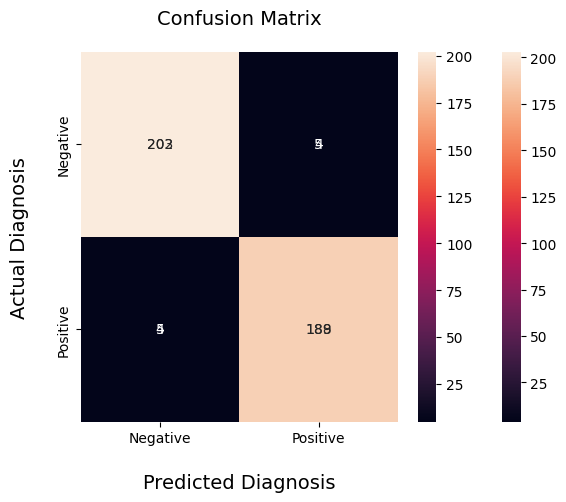

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest , ytrain, ytest = train_test_split(final_feature_df ,y,test_size = 0.20, random_state = 2)


classifiers = [("svm", SVC(kernel= "sigmoid", gamma  = 1.0, probability=True).fit(X_train,y_train)), ("nbc", mnb.fit(X_train,y_train)),
               ("RF", rfc.fit(X_train,y_train)),("Adaboost", abc.fit(X_train,y_train)),("DT", dtc.fit(X_train,y_train)),
               ("ldrnbc", mnb.fit(Xtrain,ytrain))]
ensemble = VotingClassifier(classifiers, voting='soft')

classifiers = [("svm", SVC(kernel= "sigmoid", gamma  = 1.0, probability=True).fit(X_train,y_train)), ("nbc", mnb.fit(X_train,y_train)),
               ("RF", rfc.fit(X_train,y_train)),("DT", dtc.fit(X_train,y_train)), ("lr", lrc.fit(X_train,y_train)),
               ("ldrnbc", mnb.fit(Xtrain,ytrain))]
ensemble2 = VotingClassifier(classifiers, voting='soft')

classifiers_lr = [("svm", SVC(kernel= "sigmoid", gamma  = 1.0, probability=True).fit(X_train,y_train)), ("nbc", mnb.fit(X_train,y_train)),
               ("RF", rfc.fit(X_train,y_train)),("DT", dtc.fit(X_train,y_train)),
               ("ldrnbc", mnb.fit(Xtrain,ytrain))]
classifiers_lr = VotingClassifier(classifiers_lr, voting='soft')

classifiers_df = [("svm", SVC(kernel= "sigmoid", gamma  = 1.0, probability=True).fit(X_train,y_train)), ("nbc", mnb.fit(X_train,y_train)),
               ("RF", rfc.fit(X_train,y_train)), ("lr", lrc.fit(X_train,y_train)),
               ("ldrnbc", mnb.fit(Xtrain,ytrain))]
classifiers_df = VotingClassifier(classifiers_df, voting='soft')

classifiers_svm = [ ("nbc", mnb.fit(X_train,y_train)),
               ("RF", rfc.fit(X_train,y_train)),("DT", dtc.fit(X_train,y_train)), ("lr", lrc.fit(X_train,y_train)),
               ("ldrnbc", mnb.fit(Xtrain,ytrain))]
classifiers_svm = VotingClassifier(classifiers_svm, voting='soft')



clfs = {
    'NB': mnb,
    #'NBC': nbC,
    #'SVC': svc,
    #'Ensemble':ensemble,
    #'Ensemble':ensemble2,
    #"wiTHOUT LR": classifiers_lr,
    "Ensemble": classifiers_df,
    #"svm":classifiers_svm
    #'SVM': svm2, #this one work

}

accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision, current_classification, x, con_matrix = train_classifier(clfs, Xtrain, ytrain, Xtest, ytest)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    print(current_classification)
    print(con_matrix)
    #plot_confusion_matrix(con_matrix)


